# 1. Import libraries and data

In [1]:
# import libraries and data
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import folium
import json

In [2]:
fpath = r'C:\Users\Mei\Medical insurance'

In [3]:
df_ori = pd.read_csv(os.path.join(fpath,'original data','insurance.csv'), index_col = False)

In [4]:
df_ori.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df_ori.rename(columns = {'bmi':'body_mass_index'}, inplace = True)

In [6]:
df_ori.shape

(1338, 7)

In [7]:
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1338 non-null   int64  
 1   sex              1338 non-null   object 
 2   body_mass_index  1338 non-null   float64
 3   children         1338 non-null   int64  
 4   smoker           1338 non-null   object 
 5   region           1338 non-null   object 
 6   charges          1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# 2. Data integrety and consistency

## Missing data check

In [8]:
df_ori.isnull().sum()

age                0
sex                0
body_mass_index    0
children           0
smoker             0
region             0
charges            0
dtype: int64

## Mixed data type check

In [9]:
for col in df_ori.columns.tolist():
    wierd = (df_ori[[col]].applymap(type) != df_ori[[col]].iloc[0].apply(type)).any(axis =1)
    if len(df_ori[wierd]) >0 :
        print(col)

## Duplicates check

In [10]:
df_ori[df_ori.duplicated()]

,age,sex,body_mass_index,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


## Extrem records

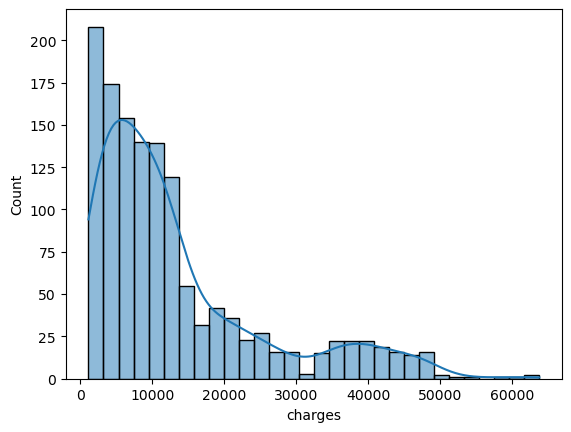

In [11]:
fig1 = sns.histplot(df_ori['charges'], bins = 'auto',kde = True)

### conclusions for the above checks: 
### there are no missing values, no duplicates, no mixed type data and no extrem records

In [12]:
df_ori.to_pickle(os.path.join(fpath,'cleaned data','insurance_clean.pkl'))

# 3. Choropleth map

In [13]:
jpath = r'C:\Users\Mei\Medical insurance\original data\geoJSON_us_regions'

In [14]:
f = open(jpath)
data = json.load(f)

for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'name': 'Midwest'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-104.32617187499999, 49.03786794532644], [-103.974609375, 41.04621681452063], [-101.6015625, 41.04621681452063], [-102.48046875, 37.020098201368114], [-94.5703125, 37.09023980307208], [-93.603515625, 36.4566360115962], [-89.296875, 37.23032838760387], [-87.71484375, 38.272688535980976], [-85.4296875, 38.54816542304656], [-84.638671875, 39.16414104768742], [-83.232421875, 38.75408327579141], [-82.177734375, 38.685509760012], [-80.85937499999999, 39.842286020743394], [-80.595703125, 41.57436130598913], [-83.583984375, 41.96765920367816], [-82.79296874999999, 42.4234565179383], [-82.705078125, 43.389081939117496], [-83.232421875, 43.70759350405294], [-84.111328125, 43.96119063892024], [-83.49609375, 44.653024159812], [-84.55078125, 45.460130637921004], [-85.4296875, 45.1510532655634], [-86.396484375, 44.213709909702054], [-86.220703125, 43.389081939117496], [-86.220703125, 42.163403424

In [15]:
df_ori.head()

,age,sex,body_mass_index,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [28]:
data_to_plot = df_ori[['region','charges']]
data_to_plot.head()

,region,charges
0,southwest,16884.92400
1,southeast,1725.55230
2,southeast,4449.46200
3,northwest,21984.47061
4,northwest,3866.85520


In [29]:
# plot choropleth map
map = folium.Map(location = [38.58,-99.09], zoom_start = 4, titles ="Stamen Terrain")

folium.Choropleth(
geo_data = jpath,
data = data_to_plot,
columns =['region','charges'],
key_on ='feature.properties.name',
fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    
legend_name ="charges").add_to(map)

folium.LayerControl().add_to(map)

map


### This map doesn't answer any of my questions